In [12]:
import numpy as np

In [13]:
q=5
phi=1/q

In [14]:
# Hofstadter Matrix
def Hq(kx, ky, q):
    Hk = np.zeros((q,q), dtype=complex)
    t = 1;p = 1
    for i in range(0, q):
        Hk[i,i] = -2*t*np.cos(ky-2*i*np.pi*phi)
        if i==q-1:
            Hk[i,i-1] = 1
        elif i==0:
            Hk[i,i+1] = 1
        else:
            Hk[i,i-1] = 1
            Hk[i,i+1] = 1
        Hk[0,q-1]= -t*np.exp(-q*1.j*kx)
        Hk[q-1,0]= -t*np.exp(q*1.j*kx)
    return Hk

In [15]:
# Discreatizing Brillioun Zone
Nkx = q*q
Nky = q*Nkx
kkx=np.linspace(0,2.*np.pi/q,Nkx,endpoint=False)
kky=np.linspace(0,2.*np.pi,Nky,endpoint=False)

In [16]:
# Eigenvalues and Eigenenergies of Matrix
EEA=np.empty([Nkx,Nky,q])
UUA=np.empty([Nkx,Nky,q,q],dtype=complex)
for ikx, kx in enumerate(kkx):
    for iky, ky in enumerate(kky):
        EEA[ikx,iky,:],UUA[ikx,iky,:,:] = np.linalg.eigh(Hq(kx,ky,q))

Text(0.5, 1.0, 'q=5')

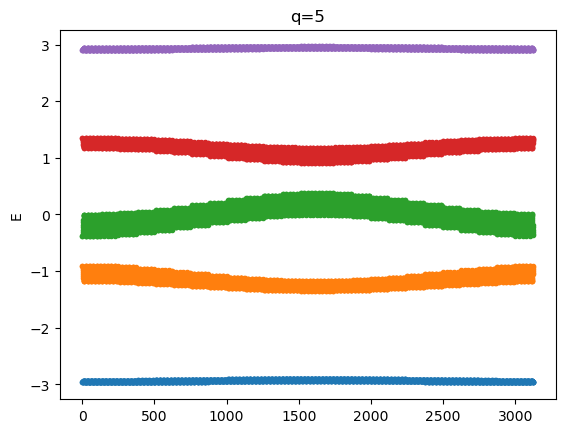

In [17]:
# Plot Energy Bands
import matplotlib.pyplot as plt
for i in range(q):
        plt.plot(EEA[:,:,i].flatten(),'.') 
plt.ylabel("E")
plt.title("q="+str(q))

In [18]:
# Diklik Bağıntısı
np.dot(np.conj(UUA[1,0,:,1]),UUA[1,0,:,1])

(0.9999999999999999+0j)

In [19]:
for bi in range(q): 
    # Caculate The Link Variables
    bj = bi # Band index  
    U1=np.zeros([Nkx,Nky],dtype=complex)
    U2=np.zeros([Nkx,Nky],dtype=complex)
    for ikx,kx in enumerate(kkx):
        for iky,ky in enumerate(kky):
            s1=np.dot(np.conj(UUA[ikx,iky,:,bi]),UUA[np.mod(ikx+1,Nkx),iky,:,bj]) 
            s2=np.dot(np.conj(UUA[ikx,iky,:,bj]),UUA[ikx,np.mod(iky+1,Nky),:,bi]) 
            U1[ikx,iky]=s1/np.abs(s1)
            U2[ikx,iky]=s2/np.abs(s2)
    # Calculate The Field Strength
#     F12=np.zeros([Nkx,Nky],dtype=complex) 
#     for ikx,kx in enumerate(kkx):
#         for iky,ky in enumerate(kky):
#             F12[ikx,iky] = U1[ikx,iky]*U2[np.mod(ikx+1,Nkx),iky]/(U1[ikx,np.mod(iky+1,Nky)]*U2[ikx,iky])
#             F12[ikx,iky] = np.log(F12[ikx,iky])
    # Alternative F12 Calculation
    F12=np.log( U1*np.roll(U2,-1,axis=0)*np.conj(np.roll(U1,-1,axis=1)*U2) )
    # Chern Number of Band Index
    print("Band Index:",bi)
    print(F12.sum()/(2j*np.pi))

Band Index: 0
(1+5.372605851219608e-15j)
Band Index: 1
(1.0000000000000002-1.3518643402332721e-15j)
Band Index: 2
(-4.000000000000001+9.975272998292575e-16j)
Band Index: 3
(1+8.713741696481976e-16j)
Band Index: 4
(1+2.300725601308854e-16j)


q=Çift olduğunda ortada dokunan bantların Chern sayılarının toplamlarının sıfır olması lazım. Ama bizim burda kullandığımız algoritma bunu hesaba katmıyor, dolayısıyla q=tek sayılar için sorunsuz çalışıyor.